In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv( '/home/dolora/Desktop/diabetes.csv')



In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum() # no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

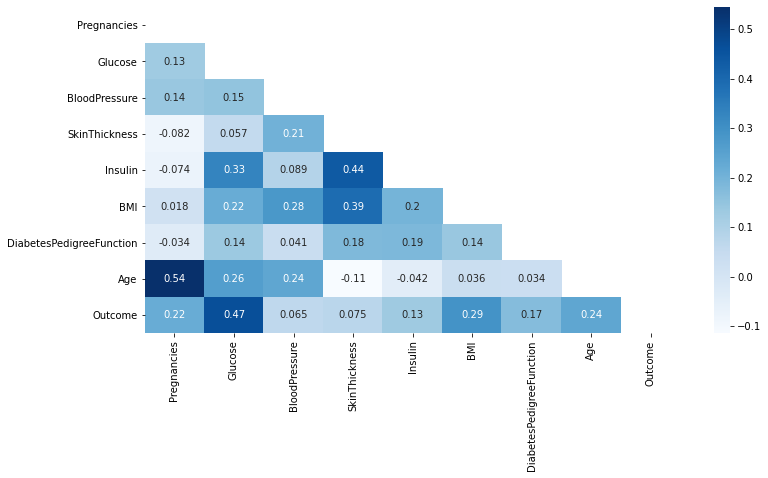

In [10]:
plt.figure(figsize=(12,6))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='Blues', mask=matrix)

In [11]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [12]:
def median_target(data, var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp


In [13]:
def replace_median(data, columns):
    for i in columns:
        f = median_target(data, i)
        display(f)
        data.loc[(data['Outcome'] == 0 ) & (data[i].isnull()), i] = f[[i]].values[0][0]
        data.loc[(data['Outcome'] == 1 ) & (data[i].isnull()), i] = f[[i]].values[1][0]



In [14]:
null_cols = ['Glucose', 'BloodPressure','SkinThickness','Insulin', 'BMI']

In [16]:
replace_median(df, null_cols)


,Outcome,Glucose
0,0,107.0
1,1,140.0


,Outcome,BloodPressure
0,0,70.0
1,1,74.5


,Outcome,SkinThickness
0,0,27.0
1,1,32.0


,Outcome,Insulin
0,0,102.5
1,1,169.5


,Outcome,BMI
0,0,30.1
1,1,34.3


In [17]:
df.isnull().sum()



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [19]:
df['Age'] = pd.qcut(df['Age'], 10, duplicates='drop')



In [20]:
df['BMI'] = pd.qcut(df['BMI'], 5, duplicates='drop')


In [21]:
df = pd.get_dummies(df)

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome,"BMI_(18.198999999999998, 26.2]","BMI_(26.2, 30.1]","BMI_(30.1, 33.72]",...,"Age_(20.999, 22.0]","Age_(22.0, 23.0]","Age_(23.0, 25.0]","Age_(25.0, 27.0]","Age_(27.0, 29.0]","Age_(29.0, 33.0]","Age_(33.0, 38.0]","Age_(38.0, 42.6]","Age_(42.6, 51.0]","Age_(51.0, 81.0]"
0,6,148.0,72.0,35.0,169.5,0.627,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,85.0,66.0,29.0,102.5,0.351,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,8,183.0,64.0,32.0,169.5,0.672,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,89.0,66.0,23.0,94.0,0.167,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,137.0,40.0,35.0,168.0,2.288,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
# Dividing data into Train and Test
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [28]:
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train, y_train)
prediction1 = logmodel.predict(X_test)


In [29]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction1))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction1))



Confusion Matrix:
 [[127  24]
 [ 25  55]]


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       151
           1       0.70      0.69      0.69        80

    accuracy                           0.79       231
   macro avg       0.77      0.76      0.77       231
weighted avg       0.79      0.79      0.79       231



In [30]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)

In [32]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction2))



Confusion Matrix:
 [[119  32]
 [ 32  48]]


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.60      0.60      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



In [33]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))



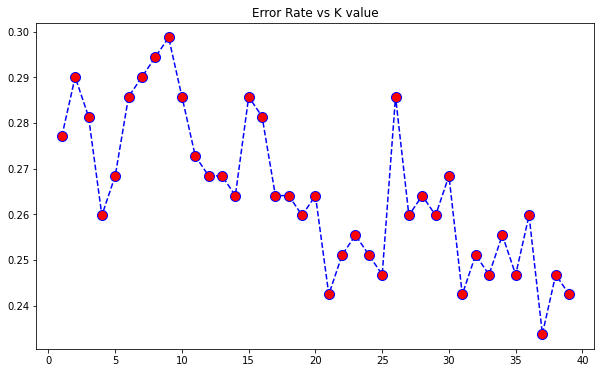

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel = ('K')
plt.ylabel = ('Error Rate')



In [35]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)


In [36]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction2))



Confusion Matrix:
 [[125  26]
 [ 34  46]]


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [37]:
#random forest
from sklearn.ensemble import RandomForestClassifier


In [38]:


rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
prediction3 = rfc.predict(X_test)



In [39]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction3))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction3))


Confusion Matrix:
 [[135  16]
 [ 15  65]]


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       151
           1       0.80      0.81      0.81        80

    accuracy                           0.87       231
   macro avg       0.85      0.85      0.85       231
weighted avg       0.87      0.87      0.87       231



In [40]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num=10)] 
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]


In [41]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}


In [42]:


from sklearn.model_selection import GridSearchCV



In [43]:
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, verbose=3, cv=10, n_jobs = 4)


In [44]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=200),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=3)

In [46]:
grid_predictions = grid_search.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, grid_predictions))
print("\n")
print(classification_report(y_test, grid_predictions))


Confusion Matrix: 
 [[136  15]
 [ 22  58]]


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       151
           1       0.79      0.72      0.76        80

    accuracy                           0.84       231
   macro avg       0.83      0.81      0.82       231
weighted avg       0.84      0.84      0.84       231



In [47]:
#SVC
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
predictions4 = svc_model.predict(X_test)
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions4))
print('\n')
print('Classification Report:\n', classification_report(y_test, predictions4))


Confusion Matrix:
 [[129  22]
 [ 25  55]]


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       151
           1       0.71      0.69      0.70        80

    accuracy                           0.80       231
   macro avg       0.78      0.77      0.77       231
weighted avg       0.79      0.80      0.80       231



In [48]:
param_grid_svm = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
from sklearn.model_selection import RandomizedSearchCV
rndm_cv = RandomizedSearchCV(estimator=svc_model, param_distributions=param_grid_svm, cv=10, verbose=2)
rndm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END .................................C=10, gamma=0.0001; total time=   0.0s
[CV] END .................................C=10, gamma=0.0001; total time=   0.0s
[CV] END .................................C=10, gamma=0.0001; total time=   0.0s
[CV] END .................................C=10, gamma=0.0001; total time=   0.0s
[CV] END .................................C=10, gamma=0.0001; total time=   0.0s
[CV] END .................................C=10, gamma=0.0001; total time=   0.0s
[CV] END .................................C=10, gamma=0.0001; total time=   0.0s
[CV] END .................................C=10, gamma=0.0001; total time=   0.0s
[CV] END .................................C=10, gamma=0.0001; total time=   0.0s
[CV] END .................................C=10, gamma=0.0001; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                   verbose=2)

In [49]:
rndm_preds = rndm_cv.predict(X_test)

In [50]:
print('Confusion Matrix:\n', confusion_matrix(y_test, rndm_preds))
print('\n')
print('Classification Report:\n', classification_report(y_test, rndm_preds))

Confusion Matrix:
 [[129  22]
 [ 25  55]]


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       151
           1       0.71      0.69      0.70        80

    accuracy                           0.80       231
   macro avg       0.78      0.77      0.77       231
weighted avg       0.79      0.80      0.80       231



In [53]:

print('The accuracy score of Logistic Regression Model is: ', accuracy_score(y_test, prediction1)*100,'%')
print('The accuracy score of K Nearest Neighbors Model is: ', accuracy_score(y_test, prediction2)*100,'%')
print('The accuracy score of Random Forests Model is: ', accuracy_score(y_test, prediction3)*100,'%')
print('The accuracy score of SVM Model is: ', accuracy_score(y_test, rndm_preds)*100,'%')

The accuracy score of Logistic Regression Model is:  78.78787878787878 %
The accuracy score of K Nearest Neighbors Model is:  74.02597402597402 %
The accuracy score of Random Forests Model is:  86.58008658008657 %
The accuracy score of SVM Model is:  79.65367965367966 %


In [54]:
lr_acc = accuracy_score(y_test, prediction1)
knn_acc = accuracy_score(y_test, prediction2)
rfc_acc = accuracy_score(y_test, prediction3)
SVM_acc = accuracy_score(y_test, rndm_preds)


In [55]:
model = ['Logistic Regression', 'K Nearest Neighbors', 'Random Forests', 'Support Vector Machines',
         ]
score = [lr_acc, knn_acc, rfc_acc, SVM_acc]


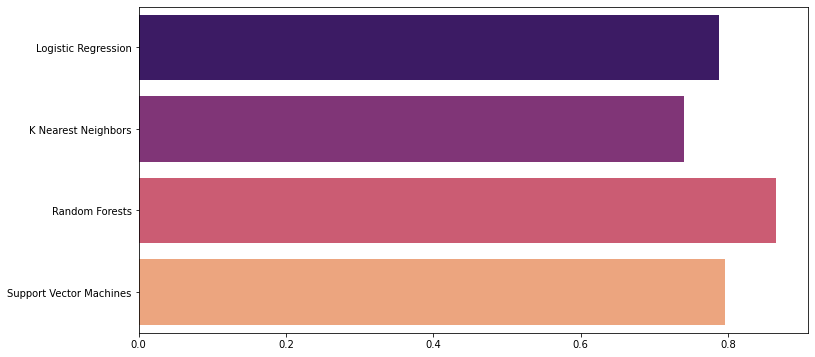

In [56]:
plt.figure(figsize = (12, 6))
sns.barplot(x = score, y = model, palette = 'magma')
plt.show()
